In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
# CSV file path in Google Drive
# file_path = '/content/drive/MyDrive/Dataset/DigitalExposome Dataset.csv'
file_path = 'DigitalExposome Dataset.csv'
# Load dataset using Pandas
df = pd.read_csv(file_path)

# Display the top 5 rows of the dataset
df.head()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
0,0.0,0.377574,0.0,0.511358,0.003018,0.003091,0.871758,0.000000,5,0.000000,0.0,0.0
1,0.0,0.196398,0.0,0.490903,0.003018,0.003091,0.876848,0.003091,5,0.001854,0.0,0.0
2,0.0,0.454163,0.0,0.470449,0.006036,0.006181,0.881939,0.006181,5,0.003709,0.0,0.0
3,0.0,0.322451,0.0,0.449995,0.009055,0.009272,0.887030,0.009272,5,0.005563,0.0,0.0
4,0.0,0.237595,0.0,0.429540,0.012073,0.012362,0.892121,0.012362,5,0.007417,0.0,0.0


In [3]:
df.describe()

,IBI,HR,NO2,Noise,NH3,PM10,CO,PM25,Label,PM1,EDA,BVP
count,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000,42436.000000
mean,0.178688,0.530687,0.502239,0.427541,0.564276,0.208474,0.679874,0.224901,3.326185,0.230773,0.260318,0.482902
std,0.230127,0.266531,0.274914,0.247601,0.294515,0.210981,0.308111,0.223242,1.599863,0.255253,0.221725,0.175569
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,0.000000,0.309505,0.285412,0.214008,0.305285,0.017624,0.458047,0.012362,2.000000,0.006310,0.060686,0.449963
50%,0.016760,0.491213,0.489703,0.403671,0.644756,0.158454,0.805352,0.176150,4.000000,0.176316,0.216064,0.512280
75%,0.309984,0.776388,0.736983,0.618592,0.826943,0.326889,0.909832,0.376813,5.000000,0.407268,0.421109,0.579756
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,1.000000,5.000000,24.000000,1.000000,1.000000


In [4]:
print("Shape:", df.shape)
print("Columns:", df.columns)

Shape: (42436, 12)
Columns: Index(['IBI', 'HR', 'NO2', 'Noise', 'NH3', 'PM10', 'CO', 'PM25', 'Label',
       'PM1', 'EDA', 'BVP'],
      dtype='object')


# Check Data type

In [5]:
print("\nData Types:")
df.info()


Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42436 entries, 0 to 42435
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     42436 non-null  float64
 1   HR      42436 non-null  float64
 2   NO2     42436 non-null  float64
 3   Noise   42436 non-null  float64
 4   NH3     42436 non-null  float64
 5   PM10    42436 non-null  float64
 6   CO      42436 non-null  float64
 7   PM25    42436 non-null  float64
 8   Label   42436 non-null  int64  
 9   PM1     42436 non-null  float64
 10  EDA     42436 non-null  float64
 11  BVP     42436 non-null  float64
dtypes: float64(11), int64(1)
memory usage: 3.9 MB


In [6]:
# cek missing value
df.isnull().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

In [7]:
# Duplicated
df.duplicated().sum()

14342

In [8]:
# Cek data NaN
df.isna().sum()

IBI      0
HR       0
NO2      0
Noise    0
NH3      0
PM10     0
CO       0
PM25     0
Label    0
PM1      0
EDA      0
BVP      0
dtype: int64

## Prepocessing

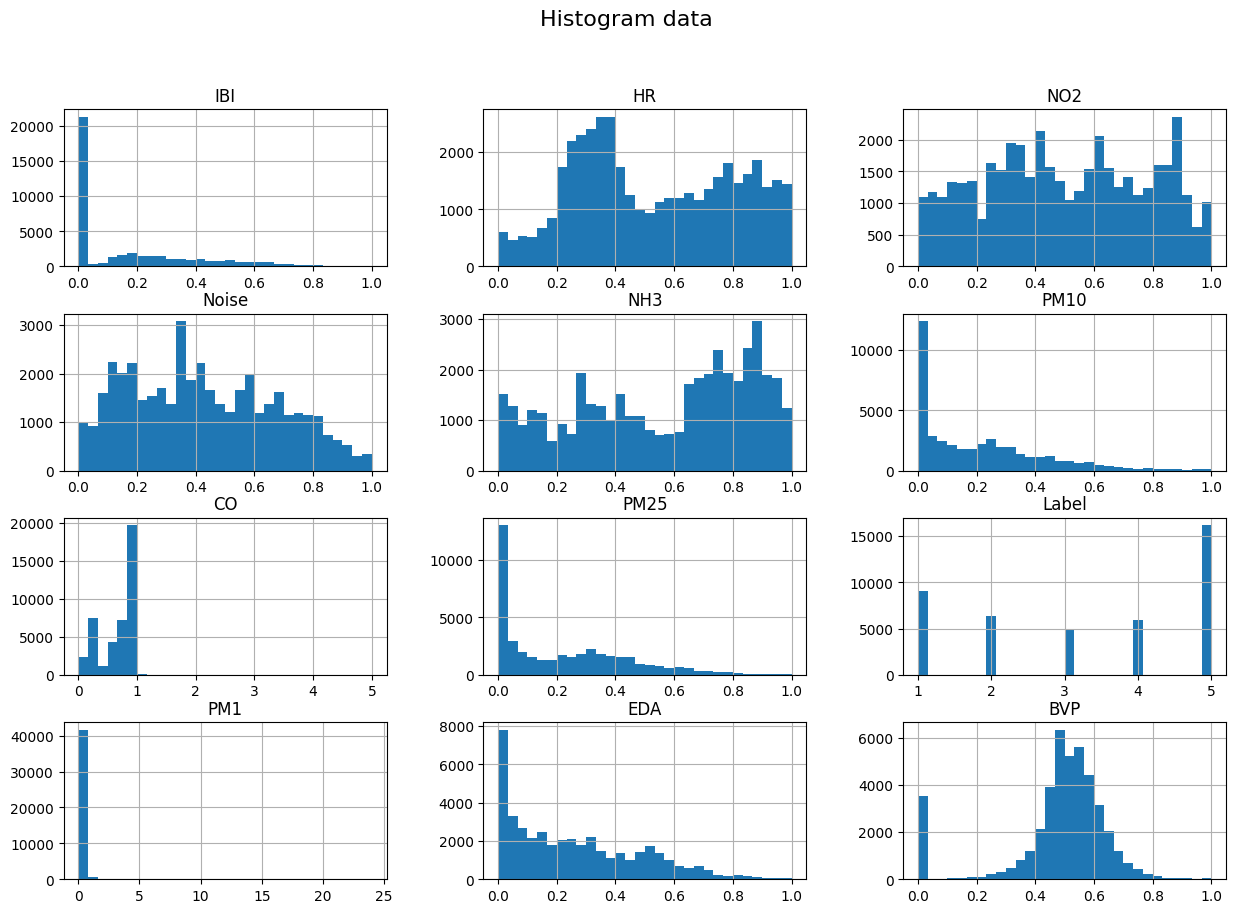

In [ ]:
df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram data", fontsize=16)
plt.show()

In [10]:
df.shape

(42436, 12)

/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_2717/3045415140.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


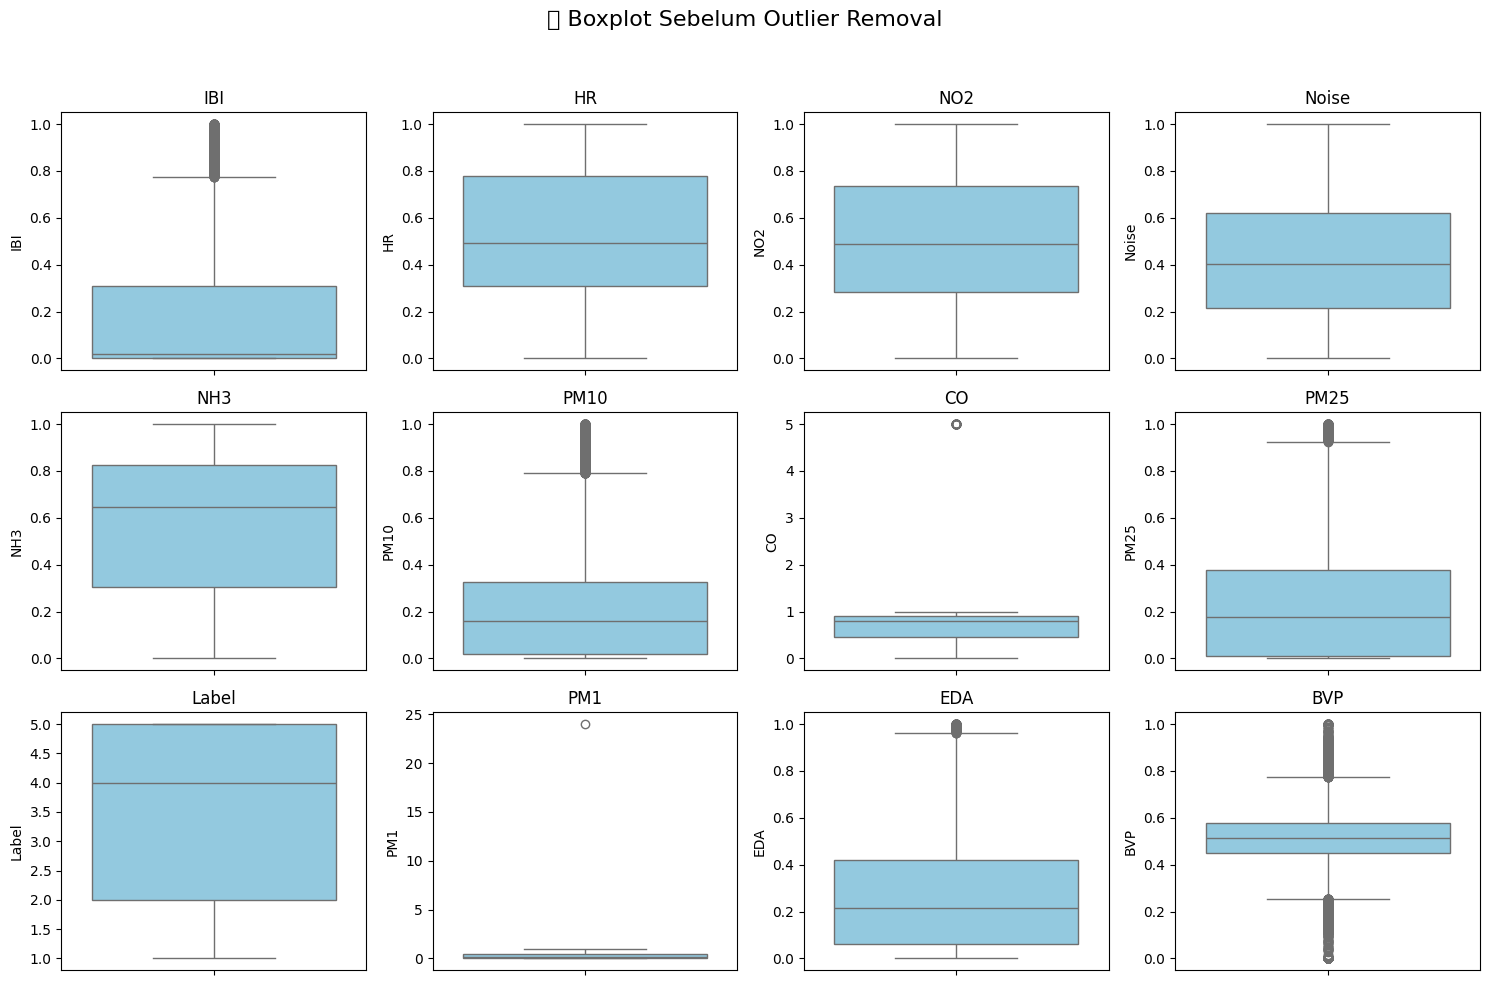

In [12]:
# Simpan salinan data sebelum outlier removal (untuk visualisasi)
df_before_outlier = df.copy()
import matplotlib.pyplot as plt
import seaborn as sns

# Buat grid layout otomatis sesuai jumlah kolom
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()  # supaya bisa diiterasi

for i, col in enumerate(df.columns):
    sns.boxplot(y=df_before_outlier[col], color='skyblue', ax=axes[i])
    axes[i].set_title(f"{col}")

# Hapus axis kosong kalau jumlah kolom tidak pas
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("📊 Boxplot Sebelum Outlier Removal", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [13]:
### Outlier Detection and Removal using Z-score
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]  # Keep only rows where all Z-scores < 3

In [14]:
print("Shape after removing outliers:", df.shape)

Shape after removing outliers: (41189, 12)



📊 Boxplot Setelah Outlier Removal


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_2717/230769811.py:25: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout(rect=[0, 0, 1, 0.95])
/Users/muhammadzuamaalamin/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


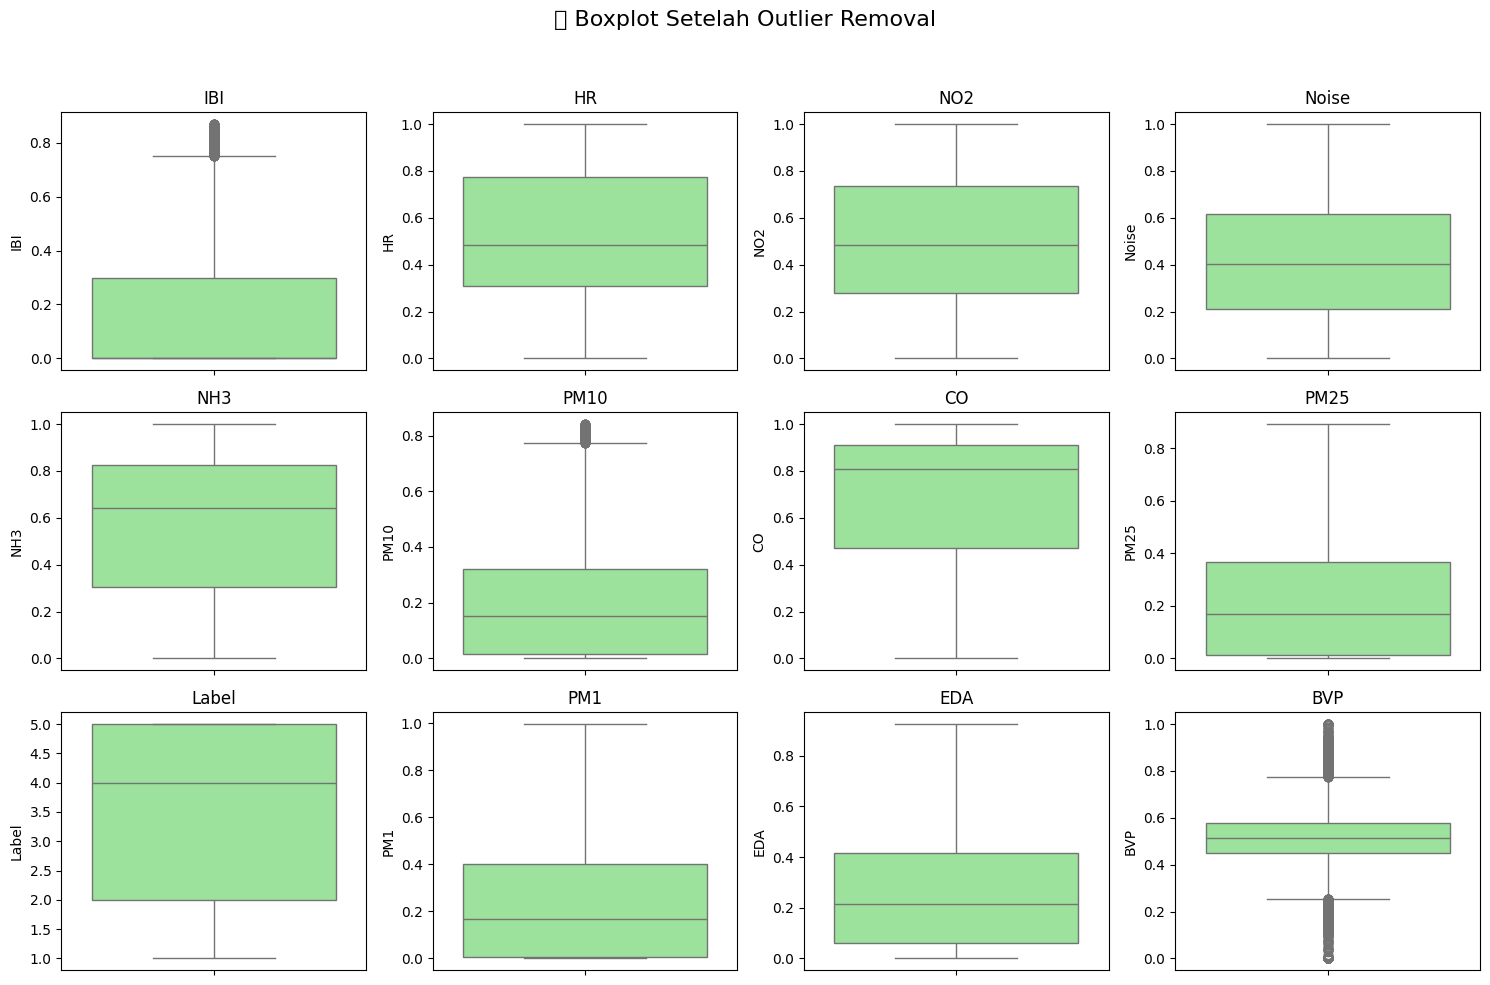

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

print("\n📊 Boxplot Setelah Outlier Removal")

# Tentukan layout grid
n_cols = 4  # jumlah boxplot per baris
n_rows = -(-len(df.columns) // n_cols)  # ceiling division

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10))
axes = axes.flatten()

# Loop setiap kolom dan pasang boxplot ke grid
for i, col in enumerate(df.columns):
    sns.boxplot(y=df[col], color='lightgreen', ax=axes[i])
    axes[i].set_title(col)

# Hapus subplot kosong kalau jumlah kolom tidak pas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Judul utama
fig.suptitle("📊 Boxplot Setelah Outlier Removal", fontsize=16)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


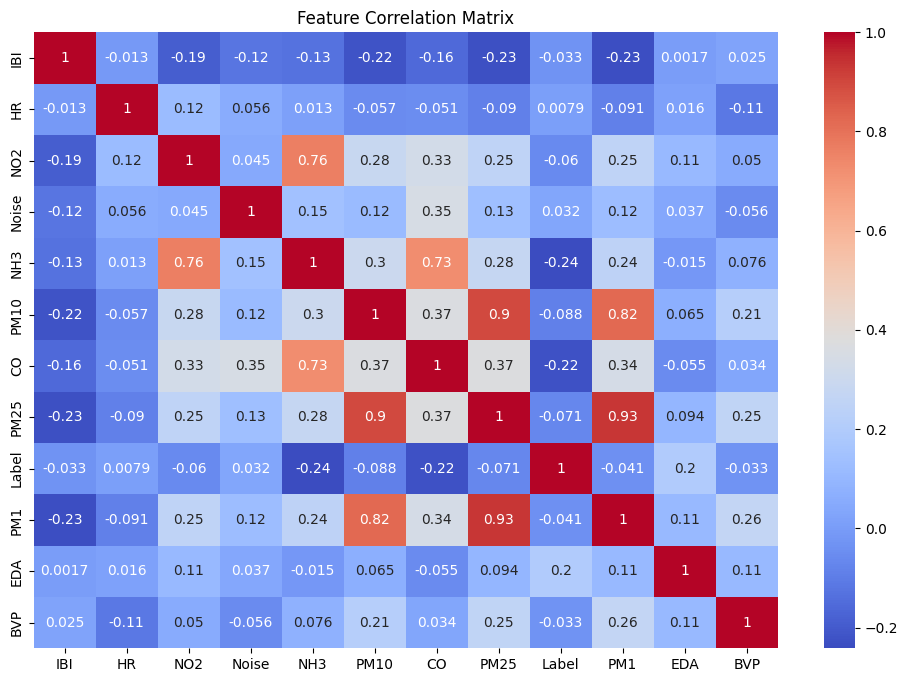

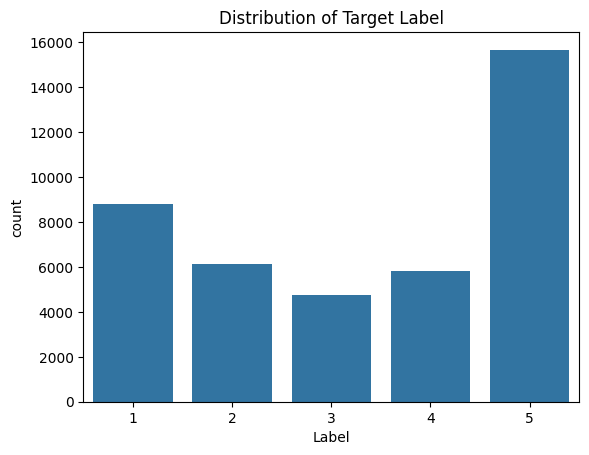

In [16]:
# Heatmap korelasi
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Matrix")
plt.show()

# Distribusi Label
sns.countplot(x='Label', data=df)
plt.title("Distribution of Target Label")
plt.show()

In [17]:
# Memisahkan fitur (X) dan label (y)
X = df.drop('Label', axis=1)
y = df['Label']

print("Shape of features (X):", X.shape)
print("Shape of target (y):", y.shape)

Shape of features (X): (41189, 11)
Shape of target (y): (41189,)


In [18]:
print(X.info())
print(y.value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 41189 entries, 0 to 42435
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     41189 non-null  float64
 1   HR      41189 non-null  float64
 2   NO2     41189 non-null  float64
 3   Noise   41189 non-null  float64
 4   NH3     41189 non-null  float64
 5   PM10    41189 non-null  float64
 6   CO      41189 non-null  float64
 7   PM25    41189 non-null  float64
 8   PM1     41189 non-null  float64
 9   EDA     41189 non-null  float64
 10  BVP     41189 non-null  float64
dtypes: float64(11)
memory usage: 3.8 MB
None
Label
5    15671
1     8805
2     6137
4     5835
3     4741
Name: count, dtype: int64


In [ ]:
## Udersampling 
import pandas as pd

# Gabungkan X dan y biar gampang sampling
df_full = X.copy()
df_full["Label"] = y

# Cari jumlah terkecil
min_count = df_full["Label"].value_counts().min()  # 4741

# Undersampling per kelas
df_balanced = (
    df_full.groupby("Label", group_keys=False)
           .apply(lambda x: x.sample(min_count, random_state=42))
)
### data balance

# Pisahkan lagi X dan y
X_balanced = df_balanced.drop("Label", axis=1)
y_balanced = df_balanced["Label"]

print(X_balanced.shape)        # (23705, 11)
print(y_balanced.value_counts())


(23705, 11)
Label
1    4741
2    4741
3    4741
4    4741
5    4741
Name: count, dtype: int64


/var/folders/c1/0skxdwdx0zdcpl8hlxr2xcz40000gn/T/ipykernel_2717/991763223.py:13: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x.sample(min_count, random_state=42))


In [20]:
X_balanced.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23705 entries, 28056 to 4698
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IBI     23705 non-null  float64
 1   HR      23705 non-null  float64
 2   NO2     23705 non-null  float64
 3   Noise   23705 non-null  float64
 4   NH3     23705 non-null  float64
 5   PM10    23705 non-null  float64
 6   CO      23705 non-null  float64
 7   PM25    23705 non-null  float64
 8   PM1     23705 non-null  float64
 9   EDA     23705 non-null  float64
 10  BVP     23705 non-null  float64
dtypes: float64(11)
memory usage: 2.2 MB


## Prepocessing

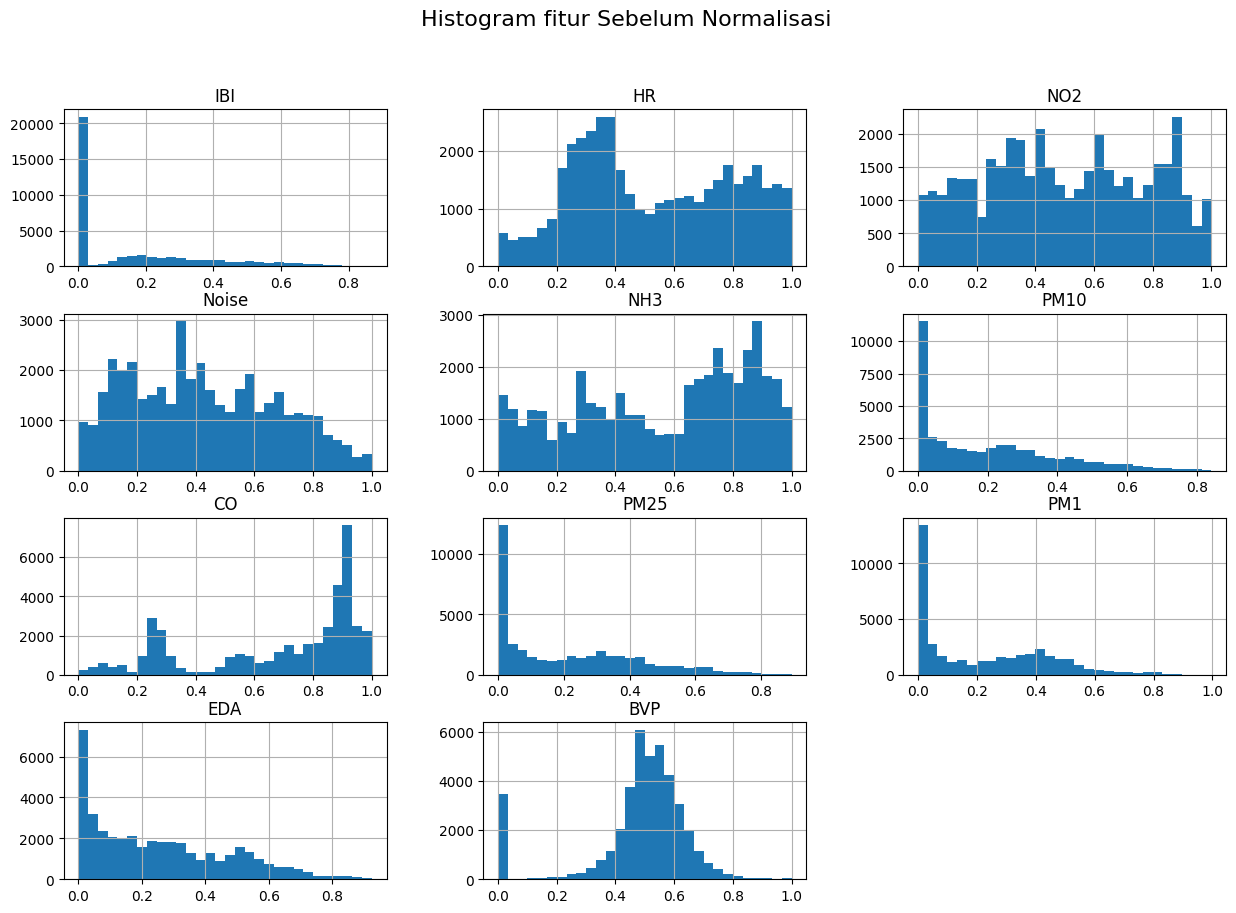

In [21]:
# Histogram sebelum normalisasi
X.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram fitur Sebelum Normalisasi", fontsize=16)
plt.show()

In [22]:
from sklearn.model_selection import train_test_split
# Split data menjadi 80% data train dan 20% data test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()

# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Data Train after normalisation = {X_train_scaled.shape}")
print(f"Data Test after normalisation = {X_test_scaled.shape}")

Data Train after normalisation = (32951, 11)
Data Test after normalisation = (8238, 11)


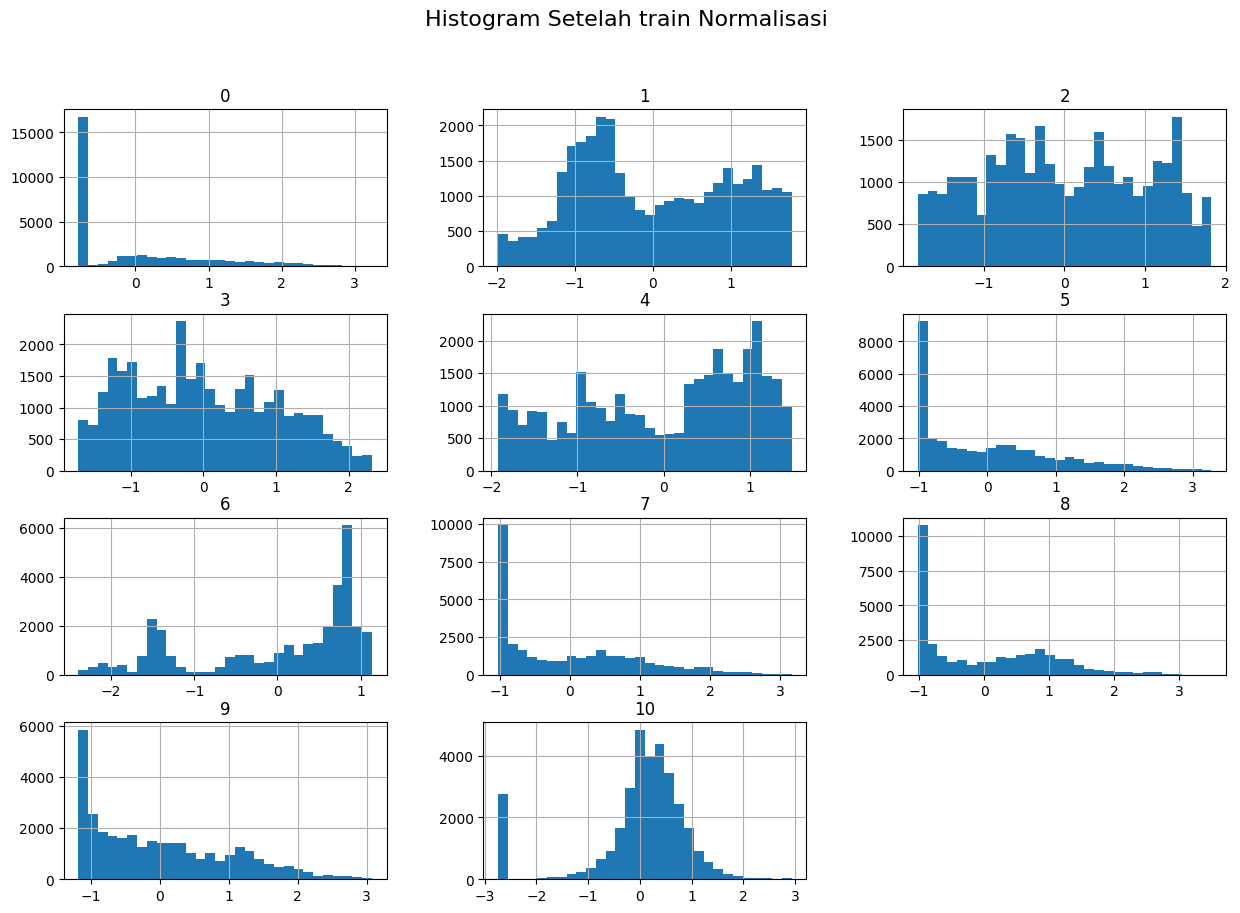

In [24]:
# Histogram setelah normalisasi
X_train_scaled_df = pd.DataFrame(X_train_scaled)
X_train_scaled_df.hist(bins=30, figsize=(15, 10))
plt.suptitle("Histogram Setelah train Normalisasi", fontsize=16)
plt.show()

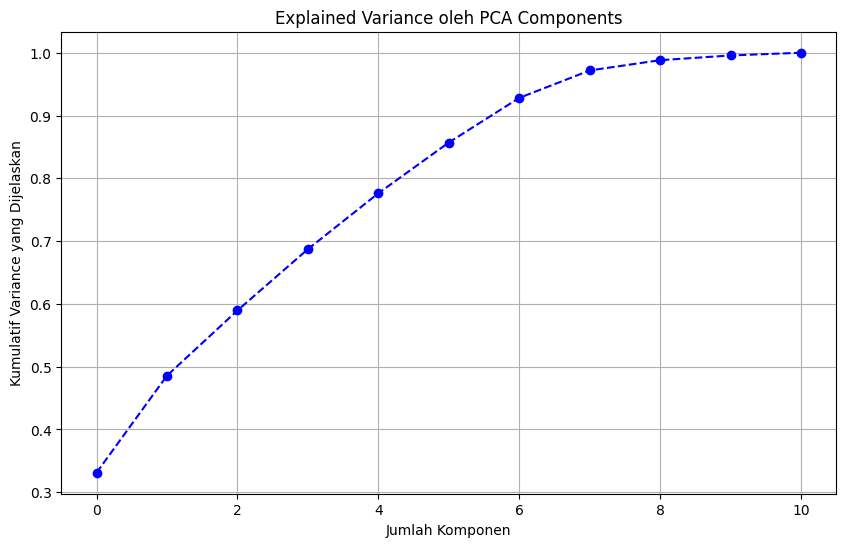

In [25]:
# Inisialisasi PCA tanpa mengurangi dimensi dulu (hanya untuk melihat explained variance)
pca = PCA(n_components=None) # Set n_components to None to keep all components initially
pca.fit(X_train_scaled)

# Plot explained variance ratio
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', linestyle='--', color='b')
plt.xlabel('Jumlah Komponen')
plt.ylabel('Kumulatif Variance yang Dijelaskan')
plt.title('Explained Variance oleh PCA Components')
plt.grid(True)
plt.show()

In [26]:
# Tampilkan variansi kumulatif
explained_variance = np.cumsum(pca.explained_variance_ratio_)
for i, var in enumerate(explained_variance):
    print(f"Komponen ke-{i+1}: {var:.4f} variance terjelaskan")

# Misal ingin menyimpan komponen yang menjelaskan >=90% variance
n_components = np.argmax(explained_variance >= 0.90) + 1
print(f"\n🔍 Jumlah komponen optimal (≥90% variance): {n_components}")

Komponen ke-1: 0.3311 variance terjelaskan
Komponen ke-2: 0.4856 variance terjelaskan
Komponen ke-3: 0.5895 variance terjelaskan
Komponen ke-4: 0.6871 variance terjelaskan
Komponen ke-5: 0.7761 variance terjelaskan
Komponen ke-6: 0.8569 variance terjelaskan
Komponen ke-7: 0.9280 variance terjelaskan
Komponen ke-8: 0.9717 variance terjelaskan
Komponen ke-9: 0.9881 variance terjelaskan
Komponen ke-10: 0.9956 variance terjelaskan
Komponen ke-11: 1.0000 variance terjelaskan

🔍 Jumlah komponen optimal (≥90% variance): 7


In [27]:
from sklearn.decomposition import PCA

# Inisialisasi PCA dengan 7 komponen
pca = PCA(n_components=7)

# Fit hanya di data train
X_train_pca = pca.fit_transform(X_train_scaled)

# Transform data test pakai PCA yang sudah fit dari train
X_test_pca = pca.transform(X_test_scaled)

print("Shape train PCA:", X_train_pca.shape)
print("Shape test PCA:", X_test_pca.shape)


Shape train PCA: (32951, 7)
Shape test PCA: (8238, 7)


## Training Data

In [28]:
import pandas as pd

# Base (data sebelum normalisasi dan PCA)
print("\n=== X_train (original) ===")
print(pd.DataFrame(X_train).head())
print("Shape:", X_train.shape)

print("\n=== X_test (original) ===")
print(pd.DataFrame(X_test).head())
print("Shape:", X_test.shape)

print("\n=== y_train ===")
print(y_train.head())
print("Shape:", y_train.shape)

print("\n=== y_test ===")
print(y_test.head())
print("Shape:", y_test.shape)

# Normalisasi
print("\n=== X_train_scaled (StandardScaler) ===")
print(pd.DataFrame(X_train_scaled).head())
print("Shape:", X_train_scaled.shape)

print("\n=== X_test_scaled (StandardScaler) ===")
print(pd.DataFrame(X_test_scaled).head())
print("Shape:", X_test_scaled.shape)

# PCA
print("\n=== X_train_pca (7 komponen) ===")
print(pd.DataFrame(X_train_pca).head())
print("Shape:", X_train_pca.shape)

print("\n=== X_test_pca (7 komponen) ===")
print(pd.DataFrame(X_test_pca).head())
print("Shape:", X_test_pca.shape)



=== X_train (original) ===
            IBI        HR       NO2     Noise       NH3      PM10        CO  \
12977  0.517128  0.284415  0.246611  0.872229  0.646159  0.345026  0.898817   
36584  0.000000  0.357652  0.821985  0.175064  0.959080  0.430619  0.895364   
31525  0.243961  0.635042  0.419748  0.063829  0.327104  0.072655  0.258582   
18438  0.319215  0.717958  0.208520  0.736786  0.664228  0.075351  0.937006   
3484   0.000000  0.481332  0.370370  0.517397  0.299558  0.239023  0.768162   

           PM25       PM1       EDA       BVP  
12977  0.611319  0.791895  0.201958  0.428074  
36584  0.298246  0.386150  0.008619  0.868089  
31525  0.072655  0.000000  0.210157  0.503498  
18438  0.074013  0.072675  0.675412  0.514364  
3484   0.314064  0.351411  0.393351  0.467247  
Shape: (32951, 11)

=== X_test (original) ===
            IBI        HR       NO2     Noise       NH3      PM10        CO  \
33888  0.464765  0.917253  0.888889  0.426341  0.912133  0.764368  0.887449   
3338 


🔹 Training Random Forest...
Accuracy Random Forest: 0.9836

Classification Report (Random Forest):
              precision    recall  f1-score   support

           1       0.99      0.99      0.99      1758
           2       0.99      0.97      0.98      1224
           3       0.97      0.97      0.97       928
           4       0.98      0.97      0.98      1141
           5       0.98      0.99      0.99      3187

    accuracy                           0.98      8238
   macro avg       0.98      0.98      0.98      8238
weighted avg       0.98      0.98      0.98      8238



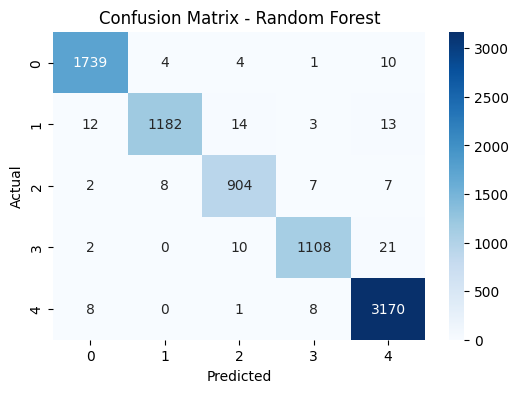


🔹 Training SVM...
Accuracy SVM: 0.7976

Classification Report (SVM):
              precision    recall  f1-score   support

           1       0.84      0.81      0.82      1758
           2       0.85      0.77      0.80      1224
           3       0.69      0.68      0.68       928
           4       0.82      0.58      0.68      1141
           5       0.79      0.92      0.85      3187

    accuracy                           0.80      8238
   macro avg       0.80      0.75      0.77      8238
weighted avg       0.80      0.80      0.79      8238



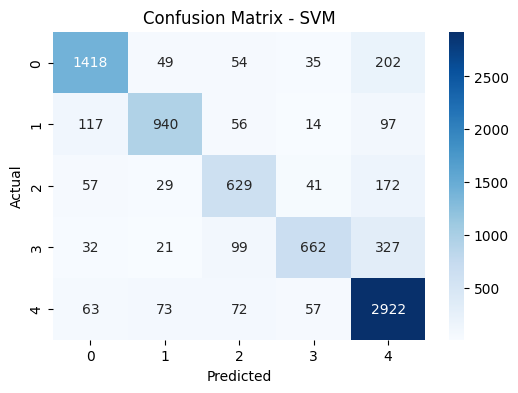


🔹 Training Naive Bayes...
Accuracy Naive Bayes: 0.4205

Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1       0.37      0.66      0.48      1758
           2       0.41      0.61      0.49      1224
           3       0.16      0.03      0.06       928
           4       0.29      0.19      0.23      1141
           5       0.55      0.41      0.47      3187

    accuracy                           0.42      8238
   macro avg       0.36      0.38      0.34      8238
weighted avg       0.41      0.42      0.39      8238



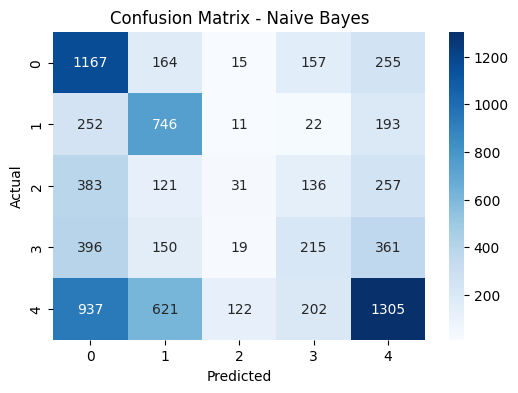


🔹 Training Decision Tree...
Accuracy Decision Tree: 0.9722

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1       0.98      0.98      0.98      1758
           2       0.96      0.96      0.96      1224
           3       0.96      0.96      0.96       928
           4       0.97      0.96      0.96      1141
           5       0.98      0.98      0.98      3187

    accuracy                           0.97      8238
   macro avg       0.97      0.97      0.97      8238
weighted avg       0.97      0.97      0.97      8238



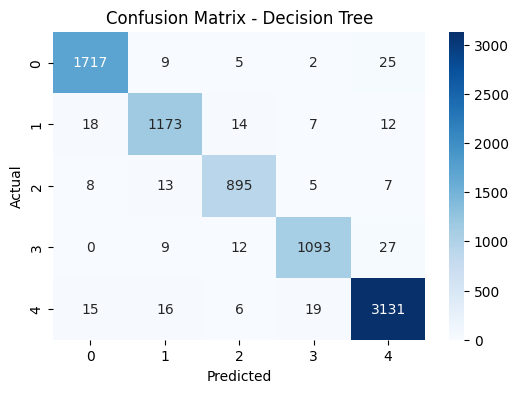


📊 Perbandingan Akurasi Model:
Random Forest: 0.9836
SVM: 0.7976
Naive Bayes: 0.4205
Decision Tree: 0.9722


In [29]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training
    model.fit(X_train_scaled, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_scaled)
    
    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy {name}: {acc:.4f}")
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred))
    
    # Simpan hasil
    results[name] = acc
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Bandingkan akurasi antar model
print("\n📊 Perbandingan Akurasi Model:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}

results = {}

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training
    model.fit(X_train, y_train)
    
    # Prediction
    y_pred = model.predict(X_test)
    
    # Evaluasi
    acc = accuracy_score(y_test, y_pred)
    print(f"Accuracy {name}: {acc:.4f}")
    print(f"\nClassification Report ({name}):")
    print(classification_report(y_test, y_pred))
    
    # Simpan hasil
    results[name] = acc
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Bandingkan akurasi antar model
print("\n📊 Perbandingan Akurasi Model:")
for name, acc in results.items():
    print(f"{name}: {acc:.4f}")



🔹 Training Random Forest...

📊 Classification Report (Random Forest):
              precision    recall  f1-score   support

           1     0.9864    0.9886    0.9875      1758
           2     0.9891    0.9673    0.9781      1224
           3     0.9679    0.9763    0.9721       928
           4     0.9840    0.9676    0.9757      1141
           5     0.9848    0.9953    0.9900      3187

    accuracy                         0.9837      8238
   macro avg     0.9824    0.9790    0.9807      8238
weighted avg     0.9838    0.9837    0.9837      8238



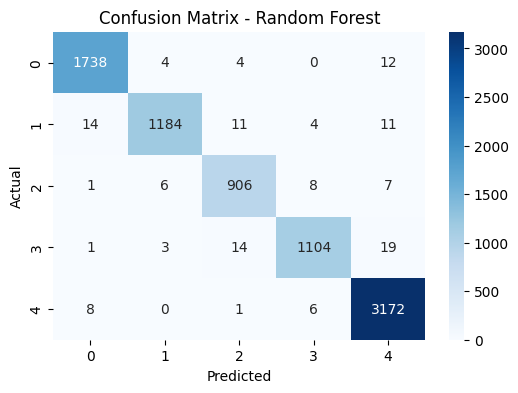


🔹 Training SVM...

📊 Classification Report (SVM):
              precision    recall  f1-score   support

           1     0.7824    0.8305    0.8057      1758
           2     0.7525    0.7949    0.7731      1224
           3     0.5756    0.8244    0.6779       928
           4     0.6558    0.7599    0.7040      1141
           5     0.9283    0.7072    0.8028      3187

    accuracy                         0.7671      8238
   macro avg     0.7389    0.7834    0.7527      8238
weighted avg     0.7936    0.7671    0.7713      8238



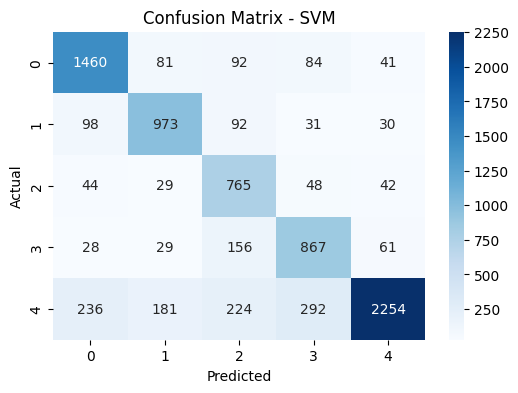


🔹 Training Naive Bayes...

📊 Classification Report (Naive Bayes):
              precision    recall  f1-score   support

           1     0.3722    0.6638    0.4770      1758
           2     0.4140    0.6095    0.4931      1224
           3     0.1566    0.0334    0.0551       928
           4     0.2937    0.1884    0.2296      1141
           5     0.5504    0.4095    0.4696      3187

    accuracy                         0.4205      8238
   macro avg     0.3574    0.3809    0.3449      8238
weighted avg     0.4122    0.4205    0.3947      8238



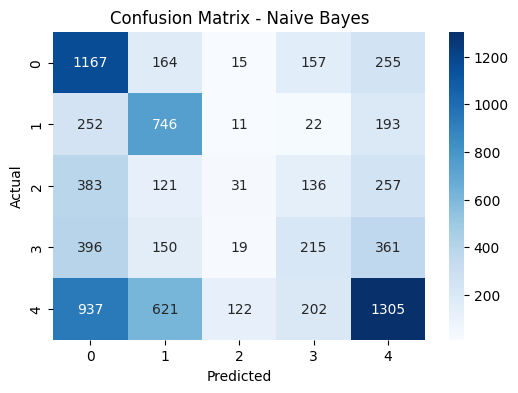


🔹 Training Decision Tree...

📊 Classification Report (Decision Tree):
              precision    recall  f1-score   support

           1     0.9690    0.9767    0.9728      1758
           2     0.9718    0.9567    0.9642      1224
           3     0.9674    0.9591    0.9632       928
           4     0.9565    0.9632    0.9598      1141
           5     0.9790    0.9805    0.9798      3187

    accuracy                         0.9714      8238
   macro avg     0.9687    0.9672    0.9680      8238
weighted avg     0.9714    0.9714    0.9713      8238



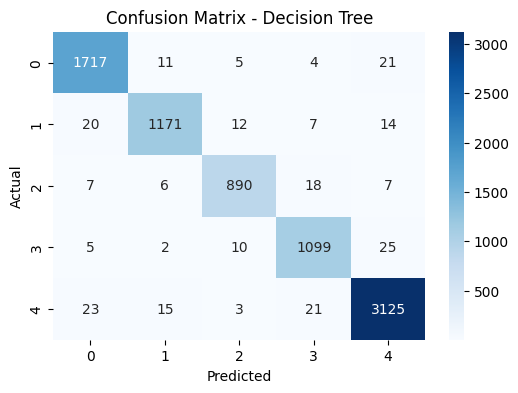

In [79]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Buat dictionary model
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced"),
    "SVM": SVC(kernel="rbf", probability=True, random_state=42, class_weight="balanced"),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier(random_state=42, class_weight="balanced")
}

# Loop training & evaluasi
for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    
    # Training
    model.fit(X_train_scaled, y_train)
    
    # Prediction
    y_pred = model.predict(X_test_scaled)
    
    # Classification Report
    print(f"\n📊 Classification Report ({name}):")
    print(classification_report(y_test, y_pred, digits=4))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(6,4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()
